### Oktoberfest Beer Data

In [8]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


a) Read the data from *visitors.csv* into a pandas dataframe.

In [10]:
visitors = pd.read_csv("visitors.csv")

b) Take a look at the dataframe's column names. Display the ten top rows of the dataframes.

In [ ]:
visitors.columns
visitors.head(10)
visitors.info() # null or non-null
visitors.describe() # summary stats

c) Select and display only the column of visitors (... only the fith row of your dataframe).

In [28]:
visitors["Visitors (million)"]
visitors[visitors.columns[1]]
visitors.loc[:,"Visitors (million)"]
visitors.iloc[:,1]

visitors.loc[4]
visitors.iloc[4, 1]

np.float64(6.3)

d) How many visitors were there in 1995?

In [41]:
visitors.loc[visitors["Year"] == 1995, "Visitors (million)"]


27    6.7
Name: Visitors (million), dtype: float64

e) What is the value range of the attribute "Beer consumption (million liters)"?

In [50]:
print(min(visitors["Beer consumption (million liters)"]), max(visitors["Beer consumption (million liters)"]))

3.84 7.7


f) What was the year with the greatest beer consumption? How much beer was consumed?

In [52]:
index = visitors["Beer consumption (million liters)"].argmax()
print(visitors.loc[index, "Year"])
print(visitors.loc[index, "Beer consumption (million liters)"])

2014
7.7


g) Plot the beer consumption over the years. Turn on the grid of your plot.

<Axes: xlabel='Year'>

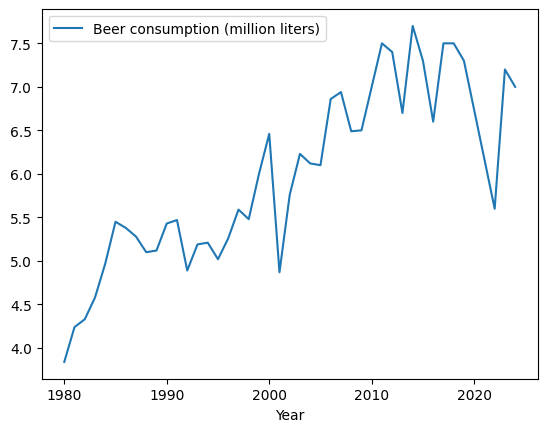

In [53]:
visitors.plot(x = "Year", y = "Beer consumption (million liters)")

h) Compute the correlation matrix of the dataframe. Which conclusions can you draw?

In [54]:
visitors.corr()
visitors.corr().iloc[2, 0]

,Year,Visitors (million),Beer consumption (million liters)
Year,1.000000,-0.029103,0.869266
Visitors (million),-0.029103,1.000000,0.188244
Beer consumption (million liters),0.869266,0.188244,1.000000


i) Load the data from *beer_price.csv* into a second dataframe. Then merge the two dataframes based on the year with an outer join.  
Observe which values you get for years that are not listed in some of the data sets.

In [56]:
beer = pd.read_csv("beer_price.csv")
visitors_beer = pd.merge(visitors, beer, hpw = "outer", on = "Year")
visitors_beer = visitors.join(beer, how="outer", on="Year", lsuffix="_left", rsuffix="_right")
visitors_beer.head()

,Year,Visitors (million),Beer consumption (million liters),Min price,Max price
0,1971,NaN,NaN,2.5,2.95
1,1972,NaN,NaN,2.6,3.05
2,1973,NaN,NaN,2.9,3.25
3,1974,NaN,NaN,3.2,3.50
4,1975,NaN,NaN,3.5,3.75


j) Until 2001, the beer price is reported in DEM ("Deutsche Mark"), the former German currency. 
Adjust the beer prices (min and max) to give values in EUR.
You may assume that 1 EUR = 1.95583 DEM. 

In [ ]:
dem_currency = 1.95583
visitors_beer.loc[visitors_beer["Year"] < 2002, 'Min price':'Max price'] = visitors_beer.loc[visitors_beer["Year"] < 2002, 'Min price':'Max price'] / dem_currency
visitors_beer

k) Compute the mean and variance of "Min price" during the period from 2000 to 2007.

In [65]:
visitors_beer.loc[(visitors_beer["Year"] >= 2000) & (visitors_beer["Year"] <= 2007), "Min price"].mean()
visitors_beer.loc[(visitors_beer["Year"] >= 2000) & (visitors_beer["Year"] <= 2007), "Max price"].mean()
visitors_beer.loc[(visitors_beer["Year"] >= 2000) & (visitors_beer["Year"] <= 2007), "Min price"].var()
visitors_beer.loc[(visitors_beer["Year"] >= 2000) & (visitors_beer["Year"] <= 2007), "Max price"].var()

np.float64(0.24526015757694714)

l) Add a new column to the merged dataframe, describing the relative difference in beer prices
between two consecutive years in percent. Plot this difference against "Year".

In [66]:
visitors_beer["average price"] = (visitors_beer["Min price"] + visitors_beer["Max price"]) / 2 
visitors_beer["price_diff_percentage"] = visitors_beer["average price"].pct_change() * 100

visitors_beer["Price increase (%)"] = (
    (visitors_beer["Min price"]) #shift
)

,Year,Visitors (million),Beer consumption (million liters),Min price,Max price,average price,price_diff_percentage
0,1971,NaN,NaN,1.278230,1.508311,1.393270,NaN
1,1972,NaN,NaN,1.329359,1.559440,1.444400,3.669725
2,1973,NaN,NaN,1.482746,1.661699,1.572223,8.849558
3,1974,NaN,NaN,1.636134,1.789522,1.712828,8.943089
4,1975,NaN,NaN,1.789522,1.917345,1.853433,8.208955
5,1976,NaN,NaN,1.891780,2.019603,1.955691,5.517241
6,1977,NaN,NaN,2.096297,2.172990,2.134644,9.150327
7,1978,NaN,NaN,2.096297,2.224120,2.160208,1.197605
8,1979,NaN,NaN,2.326378,2.377507,2.351943,8.875740
9,1980,5.1,3.84,2.454201,2.505330,2.479766,5.434783


m) Create a bar plot displaying the minimum and maximum prices over the years.

n) Compute estimates (lower and upper bound) of the beer revenue and visualize them by bar plot.